Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**<< 10 - Scikit-learn - Modell Auswahl**](10%20-%20Scikit-learn%20-%20Data%20Preparation.ipynb)

---

# 11 - <img src=https://www.gstatic.com/devrel-devsite/prod/vf8bcd170103a60a9457e3a7682d3f70251c619395c6349d20b56cd2a80761a19/tensorflow/images/lockup.svg height=30 alt="Tensorflow"> - Einführung

[**TensorFlow**](https://www.tensorflow.org) ist ein Deep Learning Framework, das vom Google Brain Team entwickelt wurde. Im November 2015 wurde das erste Release veröffentlicht.

Nachdem immer mehr und mehr Wissenschaftler zu [**PyTorch**](https://pytorch.org), das im Oktober 2016 von Facebook AI Research veröffentlicht wurde, gewechselt sind, da sich dort neue Konzepte besser bzw. einfacher ausprobieren lassen, hat Google im September 2019 TensorFlow 2.0 veröffentlicht, das verspricht die Vorteile von PyTorch zu integrieren. 

Da Tensorflow normalerweise in der Industrie verwendet wird und eine größere Community hat, werden wir im Folgenden TensorFlow in der Version 2.X verwenden. 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# COMMENT OUT NEXT LINE FOR COLAB!
# %matplotlib notebook

2023-03-04 10:06:19.200478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 10:06:19.995780: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-04 10:06:19.995818: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-04 10:06:21.544840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
print(tf.__version__)

2.11.0


## Was ist ein Tensor?
Lasst uns zunächst das Konzept eines Tensors verstehen. Für unseren Zweck können wir einen Tensor als ein hochdimensionales Array betrachten. 
- Tensor 0. Ordnung = Skalar
- Tensor 1. Ordnung = Vektor
- Tensor 2. Ordnung = Matrix
- Tensor 3. Ordnung = Tensor

### Wie werden Matrizen in Numpy abgebildet?

In [3]:
# A NumPy array is an arbitray dimensional matrix to store numbers in
arr = np.reshape(np.arange(9),(3,3))
print(arr)
print(arr.shape)
print("------------------")

# Access dimensions of the shape.
print(arr.shape[0])
print(arr.shape[-1])
print("------------------")

# Reshaping an array.
arr1 = np.reshape(arr, newshape=(9,1))
print(arr1)
arr2 = np.reshape(arr, newshape=(-1,1)) # The -1 makes numpy infer itself the missing dimension.
print(arr2)
print("------------------")

# Indexing allows you to access specific entries of an array.
print(arr[2,1]) # row 2 (third), column 1 (second).
print(arr[1,2]) # row 1 (second), column 2 (third).
print("------------------")

# Slicing allows you to retrieve parts of an array.
print(arr[:,1]) # All rows, collumn 1.
print(arr[0:2,:]) # Rows from 0 (include) to 2 (exclude), all columns. 

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)
------------------
3
3
------------------
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
------------------
7
5
------------------
[1 4 7]
[[0 1 2]
 [3 4 5]]


### Können wir auch eine weiter Dimension zu unserem numpy-Array hinzufügen?

In [4]:
# But the exact same things work in higher dimensions!
arr = np.reshape(np.arange(27), (3,3,3))
print(arr)
print(arr.shape)
print("------------------")

# Indexing.
print(arr[0,1,2])
print("------------------")

# Slicing.
print(arr[:,2,:])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
(3, 3, 3)
------------------
5
------------------
[[ 6  7  8]
 [15 16 17]
 [24 25 26]]


### Unterschied zwischen dem TensorFlow Tensor und dem numpy Array
Grundsätzlich sind TensorFlow Tensoren und numpy Arrays das Gleiche. Und auch wieder nicht. Den Tensoren sind eigentlich Operationen.

In [8]:
# You cannot simply convert a numpy array to a tensor.
tensor = tf.Tensor(arr)

TypeError: Tensor.__init__() missing 2 required positional arguments: 'value_index' and 'dtype'

Es ist also nicht möglich ein Array einfach in ein Tensor zu konvertieren. Wenn wir einen Tensor aber als eine Operation definieren, speichert dieser das Ergebnis der Operation.

In [9]:
tensor = tf.multiply(42, arr)
print(arr)
print(tensor)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
tf.Tensor(
[[[   0   42   84]
  [ 126  168  210]
  [ 252  294  336]]

 [[ 378  420  462]
  [ 504  546  588]
  [ 630  672  714]]

 [[ 756  798  840]
  [ 882  924  966]
  [1008 1050 1092]]], shape=(3, 3, 3), dtype=int32)


Wenn die Variable bereits ein Tensor ist können alle normalen mathematischen Operationen (+, -, *, ,/ usw.) verwendet werden.

In [10]:
print(tensor/42)
print(tf.divide(tensor,42)) # That's the same thing.
print(tensor/42+tensor/42)

tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)
tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)
tf.Tensor(
[[[ 0.  2.  4.]
  [ 6.  8. 10.]
  [12. 14. 16.]]

 [[18. 20. 22.]
  [24. 26. 28.]
  [30. 32. 34.]]

 [[36. 38. 40.]
  [42. 44. 46.]
  [48. 50. 52.]]], shape=(3, 3, 3), dtype=float64)


Es ist auch einfach möglich einen Tensor in ein numpy Array zurückzuwandeln.

In [11]:
print(tensor.numpy())

[[[   0   42   84]
  [ 126  168  210]
  [ 252  294  336]]

 [[ 378  420  462]
  [ 504  546  588]
  [ 630  672  714]]

 [[ 756  798  840]
  [ 882  924  966]
  [1008 1050 1092]]]


## Erstellen eines kleinen Regressions-Datensatz
Für unser erstes TensorFlow-Modell erstellen wir uns einen eigenen Dummy-Datensatz. 

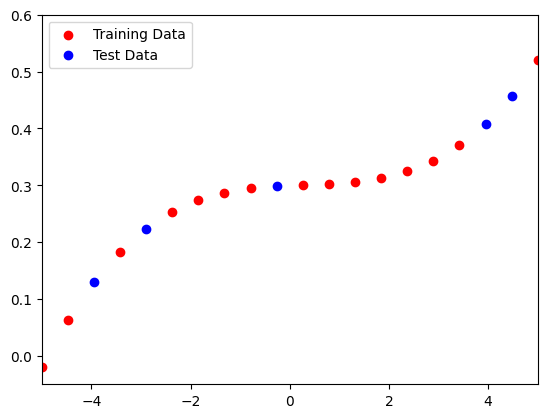

In [12]:
xs = np.linspace(-5,5, 20, dtype=np.float32)
def f(x):
    return 0.002*(x**3-x**2+2*x)+0.3
ys = f(xs)

training_data_ids = np.random.choice(20,15, replace=False)
test_data_ids = np.array([i if i not in training_data_ids else 99 for i in range(20)])
test_data_ids = test_data_ids[test_data_ids < 21]
training_data_xs = xs[training_data_ids]
training_data_ys = ys[training_data_ids]
test_data_xs = xs[test_data_ids]
test_data_ys = ys[test_data_ids]

plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')
plt.legend(("Training Data","Test Data"), loc='upper left')
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)
plt.show()

In [13]:
# First understand the shape that your data has.
print(training_data_xs.shape)
print(training_data_ys.shape)
print(test_data_xs.shape)
print(test_data_ys.shape)

(15,)
(15,)
(5,)
(5,)


### TensorFlow Dataset
Um diese Daten in TensorFlow zu verwenden, müssen wir den Datensatz in ein `tf.data.Dataset` umwandeln ([Dokumentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)). In unserem Fall verwenden wir dafür die Methode `tf.data.Dataset.from_tensor_slices()`.

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_data_xs, training_data_ys))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_xs, test_data_ys))

Um über den Datensatz zu iterieren kann einfach der `in` Operator verwendet werde. Der Testdatensatz besteht aus 5 Datenpunkten, wobei jeder Datenpunkt durch ein Tupel dargestellt wird, das die Eingabe und den Zielwert enthält 

In [15]:
for elem in test_dataset:
    print(elem)

(<tf.Tensor: shape=(), dtype=float32, numpy=-3.9473684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13003354>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-2.8947368>, <tf.Tensor: shape=(), dtype=float32, numpy=0.22314917>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-0.2631579>, <tf.Tensor: shape=(), dtype=float32, numpy=0.29877242>)
(<tf.Tensor: shape=(), dtype=float32, numpy=3.9473684>, <tf.Tensor: shape=(), dtype=float32, numpy=0.40763962>)
(<tf.Tensor: shape=(), dtype=float32, numpy=4.4736843>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4569384>)


Um den Datensatz als ganzes in das Netzwerk zu schleusen, müssen wir es batchen. Dadurch können wir die Verlustfunktion für den ganzen Datensatz minimieren. Durch das Batchen sind die Datenpunkte jetzt in zwei Arrays gespeichert -  ein Array für den Input und ein Array für den Zielwert.

In [16]:
train_dataset = train_dataset.batch(15)
test_dataset = test_dataset.batch(5)
for elem in test_dataset:
    print(elem)   

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-3.9473684, -2.8947368, -0.2631579,  3.9473684,  4.4736843],
      dtype=float32)>, <tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.13003354, 0.22314917, 0.29877242, 0.40763962, 0.4569384 ],
      dtype=float32)>)


## Das erste neuronal Netz
Jedes neuronale Netz besteht aus mehreren Schichten. Die Schichten sind also die Bausteine. TensorFlow 2.x enthält bereits viele eingebaute Schichten, die Ihr hier finden könnt: https://www.tensorflow.org/api_docs/python/tf/keras/layers.

Allerdings werden wir zunächst lernen, wie wir eigene Schichten entwickelt.

### Einfache, lineare Schicht
Unsere erste Schicht ist eine einfache, lineare Schicht, die nur den Drive berechntet. Wor verwenden hier keine Aktivierungsfunktion.

Um eine Schicht zu definieren, brauchen wir eine Klasse, die von `tf.keras.layers.Layer` erbt.

In [17]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
    """y = w.x + b"""
    
    # In the init-function you call the init of the super class "Layer".
    # You do not need to understand what the init of the super class does.
    # You then specify which parameters your specific layer requires.
    def __init__(self, units):
        super(Linear, self).__init__()
        # A simple linear layer only requires the number of 
        # "output" neurons.
        self.units = units
        
    # In the build function you define which variables your layer
    # has. In our case this is the weight matrix and the bias vector.
    # The "input_shape" variable allows you to dynamically define
    # how many columns the weight matrix needs.
    # The initializer defines how the random values are initialized 
    # in the beginning.
    # With the trainable argument you can specify whether you want the parameters
    # to be updated during training.
    def build(self, input_shape):
        self.w = self.add_weight(
                        shape=(input_shape[-1], self.units),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
        self.b = self.add_weight(
                        shape=(self.units,),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
     
    # In the call function you define what the layer should
    # return based on the given "inputs".
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

### Testen der einfachen, linearen Schicht

In [18]:
# First you have to instantiate it. Let's build a simple layer
# with 4 output neurons.

linear_layer = Linear(4)

# Now we can call it and run it on some input.
x = tf.ones((1,4))
print(x)
y = linear_layer(x)
print(y)

tf.Tensor([[1. 1. 1. 1.]], shape=(1, 4), dtype=float32)
tf.Tensor([[-0.09712841 -0.14571863  0.08365334 -0.1055803 ]], shape=(1, 4), dtype=float32)


### Mehrere Schichten verbinden
Um mehrere Schichten miteinander zu verknüpfen, können wir diese in einer neuen Klasse, die wiederum eine Schicht ist kombinieren.

In [19]:
# Let's start with a simple MLP with one hidden layer.

# Formally we define another layer. So we have to inherit again.
class MLP(Layer):
    
    def __init__(self):
        # And also call the super init again.
        super(MLP, self).__init__()
        # Here we only instantiate the layers that our network has.
        self.hidden_layer = Linear(512)
        self.output_layer = Linear(1)
        
    # In the call function we define the forward pass of the network.
    # We use ReLU as an activation function between the two layers.
    def call(self, x):
        x = self.hidden_layer(x)
        x = tf.nn.relu(x)
        x = self.output_layer(x)
        return x

### Training des neuronalen Netzes

In [21]:
# Before you instantiate a new network it might be helpful to 
# clear the session to get rid of everything that might be
# stored in the background.
tf.keras.backend.clear_session()

# Here we instantiate the above defined MLP.
mlp = MLP()

Um das neuronale Netz zu trainieren, müssen wir zuerst noch die Verlustfunktion ([Dokumentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses))und den Optimierer ([Dokumentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)) bestimmen.

In [22]:
mse = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

Dann müssen wir nur noch unsere Trainingsschleife bauen.

In [23]:
# Here we define some lists to store the training progress.
train_losses = []
test_losses = []
epochs = []

# One epoch means running through the whole dataset once. 
# As we do full batch updates this means we only have one training
# step per epoch. Thus we need many epochs.
for epoch in range(1000):
    epochs.append(epoch)
    
    # Training loop
    for (x,y) in train_dataset:
        
        # We have to reshape the input. The input has shape (15,)
        # because we have 15 samples. But if we feed it like that
        # the network thinks we feed in one 15-dimensional input. We want 15
        # 1-dimensional inputs, which would be shape (15,1). 
        # In general the shape of an input should be (batch_size, input_dimension).
        x = tf.reshape(x, shape=(-1,1))
        
        # We want TensorFlow to automatically compute the gradients
        # for our network. This means we have to start a gradient
        # tape to start recording before we feed the data through
        # the network.
        with tf.GradientTape() as tape:
            output = mlp(x)
            loss = mse(y, output)
            train_losses.append(loss)
            gradients = tape.gradient(loss, mlp.trainable_variables)
        
        # After recording the gradients we can apply them to the 
        # variables.
        optimizer.apply_gradients(zip(gradients, mlp.trainable_variables))        
    
    # Test loop 
    for (x,y) in test_dataset:
        x = tf.reshape(x, shape=(-1,1))
        output = mlp(x)
        loss = mse(y, output)       
        test_losses.append(loss)

Anschließend können wir mit unseren gesammelten Werten den Traingsprozess visualisieren.

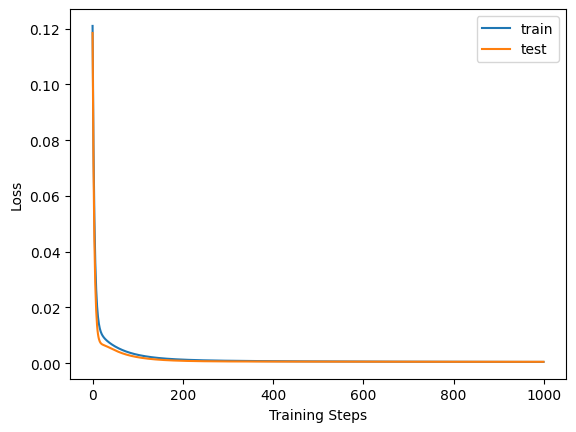

In [24]:
plt.figure()
plt.plot(epochs, train_losses)
plt.plot(epochs, np.array(test_losses))
plt.legend(("train","test"))
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

Und zum Schluss können wir auch noch die Approximation visualisieren. 

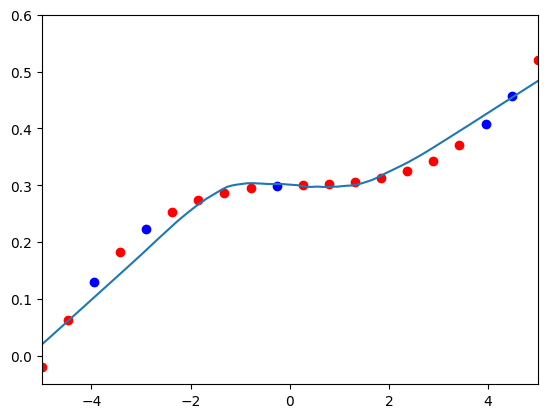

In [25]:
# Plot training and test data.
plt.figure()
plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')

# Calculate the network's output for 100 xs.
xs = np.linspace(-5,5,100, dtype=np.float32)
xs = np.reshape(xs, newshape=(-1,1))
ys = mlp(xs)

# Plot it.
plt.plot(xs,ys)
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)
plt.show()

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**>> 12 - TensorFlow - Grundlagen**](13%20-%20TensorFlow%20-%20Hands%20On.ipynb)